# Neural Networks

## Neural networks using MLPClassifier of sklearn.neural_network module

### Classifying (recognizing) hand-written digits using neural networks

### Objectives

On completing this assignment, students will be able to write a simple AI application for classifying (recognizing) hand-written digits using neural networks.


### Readings for Neural Networks

#### Required Reading: Introduction

https://www.ibm.com/topics/neural-networks#:~:text=One%20of%20the%20best%2Dknown,heart%20of%20deep%20learning%20models.

#### Optional Reading: Backpropagation

https://www.geeksforgeeks.org/backpropagation-in-neural-network

#### Required Reading: Code Example

https://www.pluralsight.com/resources/blog/guides/machine-learning-neural-networks-scikit-learn#:~:text=In%20this%20guide%2C%20you%20have,training%20and%20test%20data%2C%20respectivetiv


### Assignment
 
Write an AI application which will classify hand-written digits into numerals 0 to 9 using neural networks. This application is similar to the one you did previously. However, in this application, each image is represented with 28 by 28 pixels (instead of with 8 by 8 pixels). The data used in this application and steps to follow to write the application are outlined below.

### Loading data set and viewing its values

The data used in this assignment is provided in the following two files.

    images.pkl
    targets.pkl

The first file contains an array of shape = (60000, 28, 28). The second file contains an array of shape (60000,). We extract these arrays from the above files and store their contents into variables images and target. Then display different characteristics of those variables as shown in the code below. 

    
    import numpy as np
    import pickle

    f = open ("images.pkl", 'rb')
    images = pickle.load(f)
    f.close()
    f = open ("target.pkl", 'rb')
    target = pickle.load(f)
    f.close()

    print (type (images))
    print (type (target))
    print(images.shape)
    print(target.shape)
    print (images[0])
    print (target)
    print (target[0])


    The output of the above code is below:

    <class 'numpy.ndarray'>
    <class 'numpy.ndarray'>
    (60000, 28, 28)
    (60000,)
    [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0] 
    [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
     [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251 93  82  82  56  39   0   0   0   0   0]
     [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154 0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0 139 253 190   2   0   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0  11 190 253  70   0   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0  35 241 225 160 108   1
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119 25   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 186 253 253 150  27   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  16  93 252 253 187   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 249 253 249  64   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 130 183 253 253 207   2   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0  39 148 229 253 253 253 250 182   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0  24 114 221 253 253 253 253 201 78   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0  23  66 213 253 253 253 253 198  81   2
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0  18 171 219 253 253 253 253 195  80   9   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0  55 172 226 253 253 253 253 244 133  11   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0 136 253 253 253 212 135 132  16   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
     [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]
    
    [5 0 4 ... 5 6 8]
    5


### Results of viewing the above output

By studying the above output, we conclude the following:

- The arrays, images and target, are numpy arrays
- The shape of array images is (60000, 28, 28). So, the array contains 60000 images and each image is 28 by 28 two dimensional array.
- The array target is a one dimensional array and it contains integers, varying in values between 0 and 9 and these values correspond to images stored in array images. Above, when we display the first element of target array, it is 5. Below, we display the first image in array images and it is an image of 5. See below.

#### Displaying an image

Below, we display the first image in array images.

    import matplotlib.pyplot as plt
    
    plt.matshow(images[0])

The image shown by above code would be the image of 5.

#### Conclusions from above

From above, we conclude the following: 

- We should leave the array target as it is and use it for target values
- We should also leave the array images as it is and use it for displaying images with matplotlib.pyplot or plt as shown above.
- Using array images of shape (60000, 28, 28), we should create another array named data_flat of shape (60000, 784) (where 784 = 28 * 28) by simply reshaping the array images. This would make each image to be a one dimensional array of size 784 containing 784 pixel values and we would be able to use those image values as input to neural networks. (Neural networks require that their inputs be flat or one dimensional). Below, we create the array data_flat.


#### Create flat array

Below, we reshape the array images of shape = (60000, 28, 28) into an array of shape = (6000 , 784) and save it as array data_flat.                     

    data_flat = images.reshape(len(images),28 *28)
    print (data_flat.shape)

    output from above:
    (60000, 784)
    

#### Normalizing the flat array

The pixel values in array data_flat vary from 0 to 255. We should normalize this array by dividing each of its values by 255. So, the values of converted array data_flat_norm will vary from 0 to 1. Since, data_flat is a numpy array, we can accomplish this in single step as shown in the code below. We also display the values of one element of the converted array, data_flat_norm, to check that our method worked. (In neural networks, we normalize values because it usually improves performance.)


    data_flat_norm = data_flat/255
    print(data_flat_norm[0])

    The output from the above: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01176471 0.07058824 0.07058824 0.07058824
 0.49411765 0.53333333 0.68627451 0.10196078 0.65098039 1.
 0.96862745 0.49803922 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.11764706 0.14117647 0.36862745 0.60392157
 0.66666667 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.88235294 0.6745098  0.99215686 0.94901961 0.76470588 0.25098039
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.19215686
 0.93333333 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.99215686 0.98431373 0.36470588 0.32156863
 0.32156863 0.21960784 0.15294118 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.07058824 0.85882353 0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686 0.77647059 0.71372549
 0.96862745 0.94509804 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.31372549 0.61176471 0.41960784 0.99215686
 0.99215686 0.80392157 0.04313725 0.         0.16862745 0.60392157
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05490196 0.00392157 0.60392157 0.99215686 0.35294118
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.54509804 0.99215686 0.74509804 0.00784314 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04313725
 0.74509804 0.99215686 0.2745098  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1372549  0.94509804
 0.88235294 0.62745098 0.42352941 0.00392157 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.31764706 0.94117647 0.99215686
 0.99215686 0.46666667 0.09803922 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.17647059 0.72941176 0.99215686 0.99215686
 0.58823529 0.10588235 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.0627451  0.36470588 0.98823529 0.99215686 0.73333333
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.97647059 0.99215686 0.97647059 0.25098039 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.18039216 0.50980392 0.71764706 0.99215686
 0.99215686 0.81176471 0.00784314 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.15294118 0.58039216
 0.89803922 0.99215686 0.99215686 0.99215686 0.98039216 0.71372549
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.09411765 0.44705882 0.86666667 0.99215686 0.99215686 0.99215686
 0.99215686 0.78823529 0.30588235 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.09019608 0.25882353 0.83529412 0.99215686
 0.99215686 0.99215686 0.99215686 0.77647059 0.31764706 0.00784314
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.07058824 0.67058824
 0.85882353 0.99215686 0.99215686 0.99215686 0.99215686 0.76470588
 0.31372549 0.03529412 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.21568627 0.6745098  0.88627451 0.99215686 0.99215686 0.99215686
 0.99215686 0.95686275 0.52156863 0.04313725 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.53333333 0.99215686
 0.99215686 0.99215686 0.83137255 0.52941176 0.51764706 0.0627451
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


#### Splitting data into training and test data

Split the arrays, data_flat_norm and target, into training data and testing data, with 20% (0.20) for testing and the remaining for training, using train_test_split function from sklearn.preprocessing module (NOTE: professor made a mistake, 'sklearn.preprocessing' should be 'sklearn.model_selection').

#### Training MLPClassifier classifier from sklearn.neural_network module

Train MLPClassifier classifier with the training data (X_train) and its corresponding label data (y_train) from the previous step using the following attribute values for MLPClassifier.

    hidden_layer_sizes = (30, )
    max_iter = 50
    learning_rate_init = 0.05
    verbose = 1
    random_state = 1

    
#### Display score for training and testing values



#### Display accuracy_score, classification report, and confusion_matrix

    

#### Experiments

You are to do the following three experiments:

__Experiment 1__

Keep the following values fixed

    max_iter = 50
    learning_rate_init = 0.05

Change first hidden laye sizes as below and record the corresponding accuracy score:

    hidden layer sizes = (30,)    accuracy score = 
    hidden layer sizes = (50,)   accuracy score =
    hidden layer sizes = (70,)   accuracy score = 

__Experiment 2__

Keep the following values fixed

    max_iter = 50
    hidden layer sizes = (30,)

Change the learning rate as below and record the corresponding accuracy score:

    learning rate = 0.05   accuracy score = 
    learning rate = 0.1    accuracy score = 

__Experiment 3__

Keep the following values fixed

    hidden layer sizes = (30,)
    learning rate = 0.05

Change the max_iter as below and record the corresponding accuracy score:

    max_iter = 25    accuracy score = 
    max_iter = 50   accuracy score = 
    max_iter = 75   accuracy score =

__Summary Report__

Write a short paragraph summarizing the above results and what you learn about AI from the above experiments,




## Title: ANN Digit Classification Using MLPClassifier

### Keith Yrisarri Stateson
July 19, 2024. Python 3.11.0

##### Summary
This assignment involves building an Artificial Neural Network (ANN) to classify handwritten digits from the MNIST dataset using the MLPClassifier from Scikit-learn's neural_network module. The goal is to develop a model that can accurately recognize and classify images of digits (0-9). The assignment includes steps such as loading and preprocessing the data, building and training the model, evaluating its performance, and conducting experiments to optimize the model's parameters.

Assumptions
The dataset comprises images and their corresponding labels stored in images.pkl and targets.pkl. The input images are 28x28 pixels in size and need to be flattened for input into the neural network. Normalization of pixel values (0-255) to a range of 0-1 improves the performance of the neural network. The MLPClassifier is suitable for this classification task and can be optimized through experimentation with different parameters.

##### Summary
Data Loading and Preprocessing
- Importing Libraries
- Loading the Dataset
- Exploring the Data
- Reshaping Images
- Normalizing Pixel Values
- Splitting Data into Training and Test Sets

Building the ANN Model
- Model Architecture

Training the Model
- Training Process
- Monitoring Training Performance
- Handle overfitting

Evaluating the Model
- Model Evaluation Metrics
- Accuracy and Loss Visualization
- Confusion Matrix Analysis

Experiments
- Experiment 1: Adjusting Hidden Layer Sizes
- Experiment 2: Adjusting Learning Rates
- Experiment 3: Adjusting Maximum Iterations

Conclusion
- Summary of findings, insights, and observations
- Future improvements and considerations

## Data Loading and Preprocessing

In [1]:
import numpy as np
import pickle

f = open ("images.pkl", 'rb')
images = pickle.load(f)
f.close()
f = open ("target.pkl", 'rb')
target = pickle.load(f)
f.close()

print (type (images))
print (type (target))
print(images.shape)
print(target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)


In [2]:
print (images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [3]:
print (target)
print('\n')
print (target[0])

[5 0 4 ... 5 6 8]


5


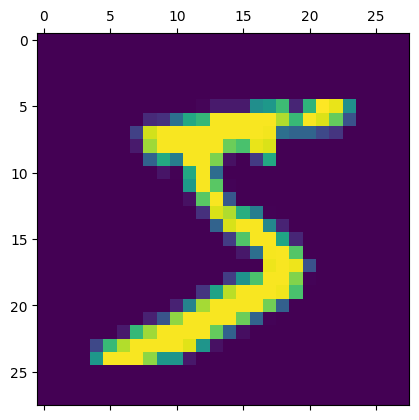

In [4]:
import matplotlib.pyplot as plt
plt.matshow(images[0])
# plt.imshow(images[0], cmap=plt.cm.gray_r, interpolation="nearest")

In [5]:
data_flat = images.reshape(len(images),28*28)
print (data_flat.shape)

(60000, 784)


In [6]:
data_flat_norm = data_flat/255
print(data_flat_norm[0])  # print(data_flat_norm[0:3])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(data_flat_norm, target, test_size=0.2, random_state=0)

print (X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Build the ANN Model

In [8]:
# Build Artificial Neural Network (ANN) model

from sklearn.neural_network import MLPClassifier

clf=MLPClassifier(hidden_layer_sizes=(30, ), max_iter=50, learning_rate_init=0.05, verbose=1, random_state=1)

## Train the Model

In [9]:
clf.fit (X_train,y_train)

Iteration 1, loss = 0.38482498
Iteration 2, loss = 0.26194635
Iteration 3, loss = 0.24298655
Iteration 4, loss = 0.22401414
Iteration 5, loss = 0.22783768
Iteration 6, loss = 0.22732241
Iteration 7, loss = 0.22727139
Iteration 8, loss = 0.21371720
Iteration 9, loss = 0.21409649
Iteration 10, loss = 0.21209832
Iteration 11, loss = 0.22849224
Iteration 12, loss = 0.22576485
Iteration 13, loss = 0.22083767
Iteration 14, loss = 0.21798569
Iteration 15, loss = 0.21962274
Iteration 16, loss = 0.21223700
Iteration 17, loss = 0.22311094
Iteration 18, loss = 0.21025982
Iteration 19, loss = 0.21707725
Iteration 20, loss = 0.22658597
Iteration 21, loss = 0.21606773
Iteration 22, loss = 0.21838172
Iteration 23, loss = 0.20921266
Iteration 24, loss = 0.21265455
Iteration 25, loss = 0.21651203
Iteration 26, loss = 0.22735869
Iteration 27, loss = 0.22091869
Iteration 28, loss = 0.19940928
Iteration 29, loss = 0.21453394
Iteration 30, loss = 0.22085885
Iteration 31, loss = 0.22039183
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(30,), learning_rate_init=0.05, max_iter=50,
              random_state=1, verbose=1)

In [10]:
# Scores range from 0 to 1, with a larger score indicating a better fit.
# The score is computed as the fraction of correctly classified samples.

# A difference between the training score and the test score is evidence of overfitting and can be reduced by decreasing the complexity of the model (e.g., the number of parameters) or by increasing the size of the training set. In this model, the difference is negligible.

print(clf.score(X_train,y_train))
print (clf.score(X_test,y_test))

0.9444583333333333
0.9291666666666667


## Evaluate the Model

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print (confusion_matrix (y_test,y_pred))

0.9291666666666667
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1205
           1       0.98      0.97      0.98      1379
           2       0.92      0.93      0.92      1166
           3       0.98      0.88      0.92      1208
           4       0.93      0.94      0.93      1153
           5       0.92      0.93      0.92      1075
           6       0.97      0.94      0.96      1190
           7       0.99      0.90      0.94      1228
           8       0.78      0.95      0.86      1191
           9       0.88      0.92      0.90      1205

    accuracy                           0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.93      0.93      0.93     12000

[[1132    0    1    0    5    6    8    0   53    0]
 [   0 1338    5    1    3    1    0    1   26    4]
 [   4    6 1079    6    9    0    7    1   53    1]
 [   0    2   43 1059    1   30    0    3   43   27]
 [   1    

## Experiment 1 - adjusting hidden_layer_sizes

In [19]:
# Access the accuracy of the model by adjusting the hidden_layer_sizes parameter

import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore', category=ConvergenceWarning)

hidden_layer_sizes = [(30,), (50,), (70,)]

for hidden_layer_size in hidden_layer_sizes:
    clf=MLPClassifier(hidden_layer_sizes=hidden_layer_size, max_iter=50, learning_rate_init=0.05, verbose=0, random_state=1)
    
    clf.fit(X_train, y_train)
    print(f'Experiment with hidden layer sizes: {hidden_layer_size}')
    print(f'CLF Score on training set: {clf.score(X_train, y_train):.4f}')
    print(f'CLF Score on test set: {clf.score(X_test, y_test):.4f}')
    y_pred = clf.predict(X_test)
    print(f'Accuracy score: {accuracy_score(y_test, y_pred):.4f}')
    print('-'*50)

Experiment with hidden layer sizes: (30,)
CLF Score on training set: 0.9445
CLF Score on test set: 0.9292
Accuracy score: 0.9292
--------------------------------------------------
Experiment with hidden layer sizes: (50,)
CLF Score on training set: 0.9601
CLF Score on test set: 0.9397
Accuracy score: 0.9397
--------------------------------------------------
Experiment with hidden layer sizes: (70,)
CLF Score on training set: 0.9465
CLF Score on test set: 0.9322
Accuracy score: 0.9322
--------------------------------------------------


## Experiment 2 - adjusting learning_rate_init

In [21]:
learning_rate_init_list = [0.05, 0.1]

for lri in learning_rate_init_list:
    clf=MLPClassifier(hidden_layer_sizes=(30,), max_iter=50, learning_rate_init=lri, verbose=0, random_state=1)
    
    clf.fit (X_train,y_train)
    print(f'Experiment with learning rate init: {lri}')
    print(f'CLF Score on training set: {clf.score(X_train, y_train):.4f}')
    print(f'CLF Score on test set: {clf.score(X_test, y_test):.4f}')
    y_pred = clf.predict(X_test)
    print(f'Accuracy score: {accuracy_score(y_test, y_pred):.4f}')
    print('-'*50)

Experiment with learning rate init: 0.05
CLF Score on training set: 0.9445
CLF Score on test set: 0.9292
Accuracy score: 0.9292
--------------------------------------------------
Experiment with learning rate init: 0.1
CLF Score on training set: 0.8856
CLF Score on test set: 0.8729
Accuracy score: 0.8729
--------------------------------------------------


## Experiment 3 - adjusting max_iter

In [22]:
max_iter_list = [25, 50, 75]

for mi in max_iter_list:
    clf=MLPClassifier(hidden_layer_sizes=(30,), max_iter=mi, learning_rate_init=0.05, verbose=0, random_state=1)
    
    clf.fit (X_train,y_train)
    print(f'Experiment with max iter: {mi}')
    print(f'CLF Score on training set: {clf.score(X_train, y_train):.4f}')
    print(f'CLF Score on test set: {clf.score(X_test, y_test):.4f}')
    y_pred = clf.predict(X_test)
    print(f'Accuracy score: {accuracy_score(y_test, y_pred):.4f}')
    print('-'*50)

Experiment with max iter: 25
CLF Score on training set: 0.9475
CLF Score on test set: 0.9327
Accuracy score: 0.9327
--------------------------------------------------
Experiment with max iter: 50
CLF Score on training set: 0.9445
CLF Score on test set: 0.9292
Accuracy score: 0.9292
--------------------------------------------------
Experiment with max iter: 75
CLF Score on training set: 0.9445
CLF Score on test set: 0.9292
Accuracy score: 0.9292
--------------------------------------------------


## Conclusion

he MLPClassifier class from skikit-learn library was used to build a neural network model for image classificaion. The model performance was optimized by adjusting the hyperparameters e.g., the number of hidden layers, the learning rate, and the number of iterations. Other hyperparameters can also be modified e.g. the number of neurons in each layer. The model performed well regarding overfitting of training and testing data, thus, no overfitting adjustments were needed.

Metrics were conducted to assess model accuracy, which performed well. Having learned to use the MLPClassifier classifier to train a neural network model on the MNIST dataset, which contained images of handwritten digits, the model can now be applied to recognize handwritten digits with a high degree of accuracy.

Best hyperparameter performers:
- Hidden layer sizes: (50,)
    - Accuracy score of 0.94
- Learning rate: 0.05
    - Accuracy score of 0.93
- Max iter: 25
    - Accuracy score of 0.93

The MLPClassifier is a powerful tool for building nueral network models for image classification.